First 5 rows of the synthetic banking dataset:
        Age    Income  LoanAmount  CreditScore  NumOfProducts  AccountBalance  \
0  0.463107 -0.996258    0.438662    -0.160039      -0.491562        0.332402   
1  1.537062 -1.112120    0.916792     1.004641      -1.892762       -1.605994   
2  1.069958 -2.684484    0.115899     1.674606       0.857899        1.523698   
3  1.816122 -0.408466    1.108788     1.406679      -0.503570        0.123160   
4  2.598907  1.339419    1.767424     1.201166      -0.753862       -0.028234   

   YearsWithBank  EmploymentDuration  Default  
0       1.802064           -1.412726        0  
1       0.268731            0.311491        0  
2       3.534072            0.553570        0  
3       1.874593           -0.150614        0  
4       1.635205            0.382654        0  

Dataset Summary:
               Age       Income   LoanAmount  CreditScore  NumOfProducts  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000   
mean    

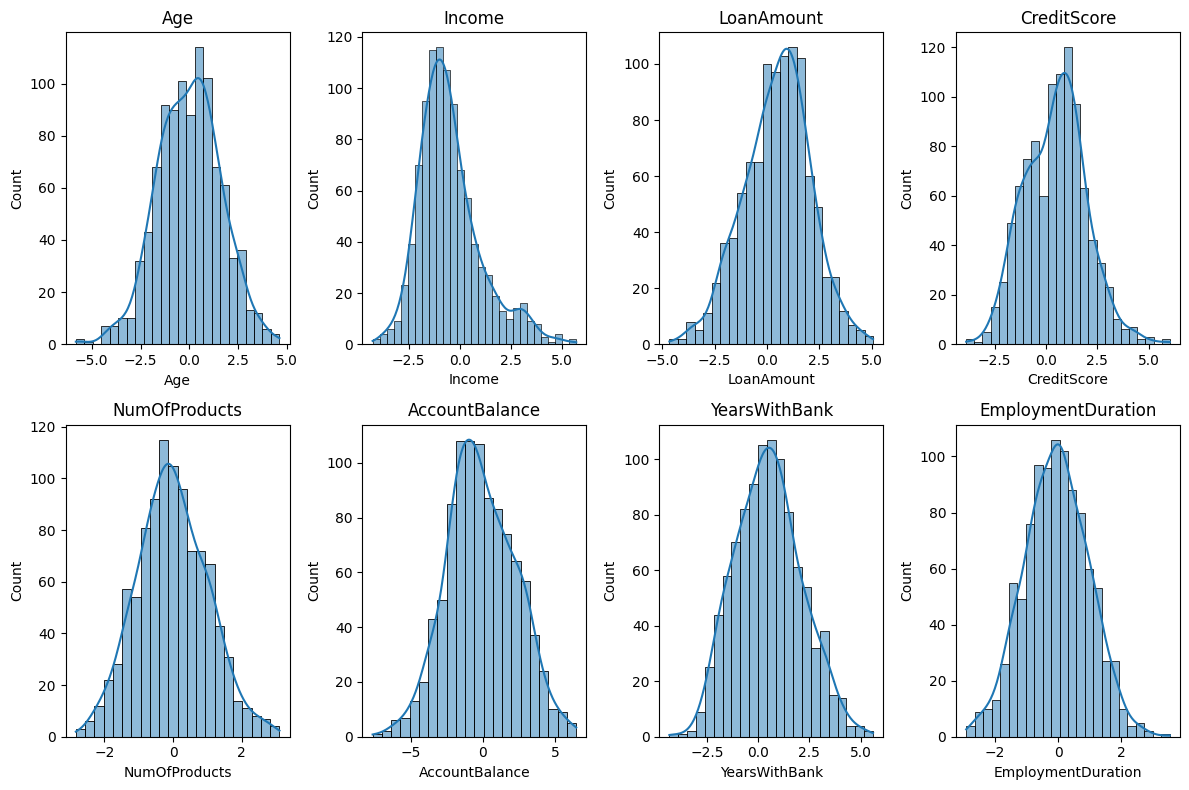

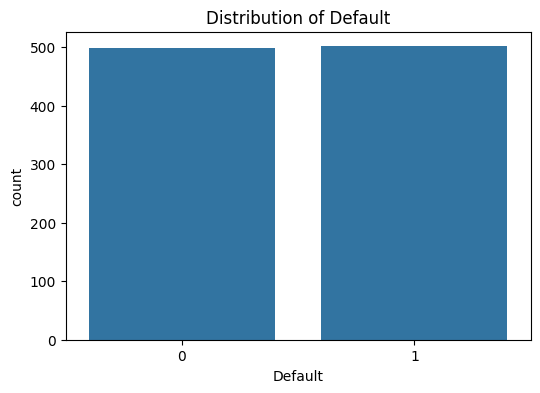


Decision Tree Classifier Evaluation:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       144
           1       0.88      0.85      0.86       156

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Confusion Matrix:
 [[125  19]
 [ 23 133]]


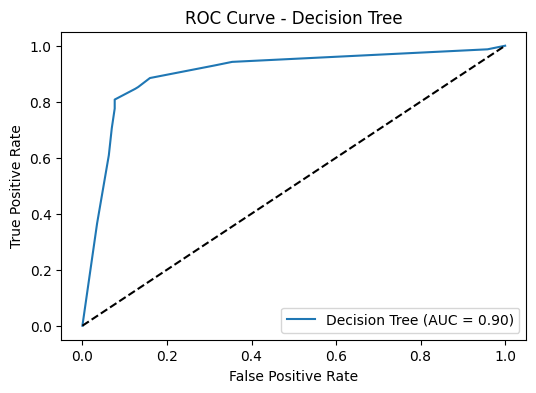

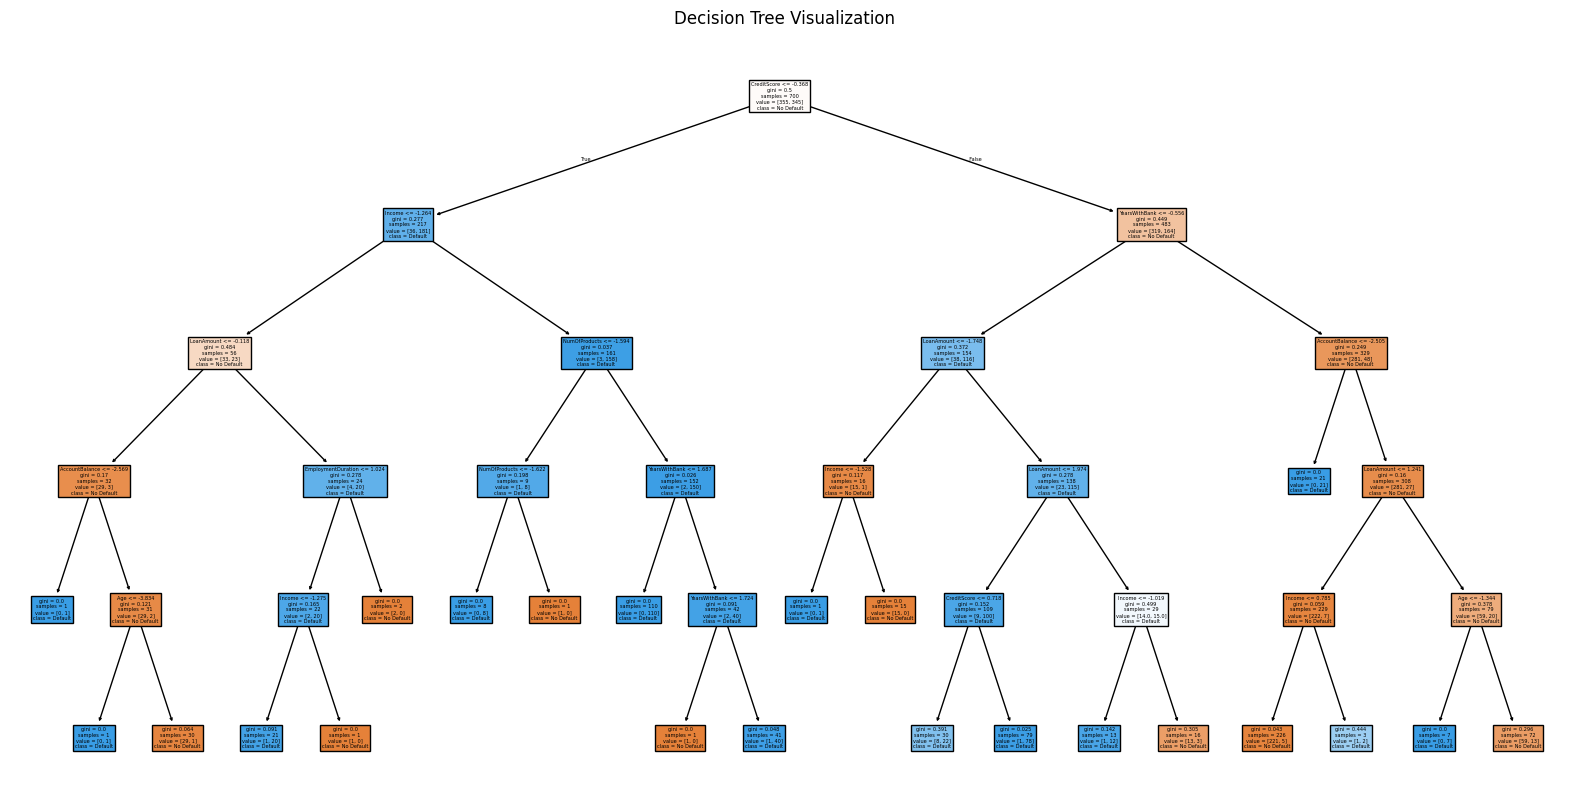


Random Forest Classifier Evaluation:
Accuracy: 0.9066666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       144
           1       0.89      0.94      0.91       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

Confusion Matrix:
 [[126  18]
 [ 10 146]]


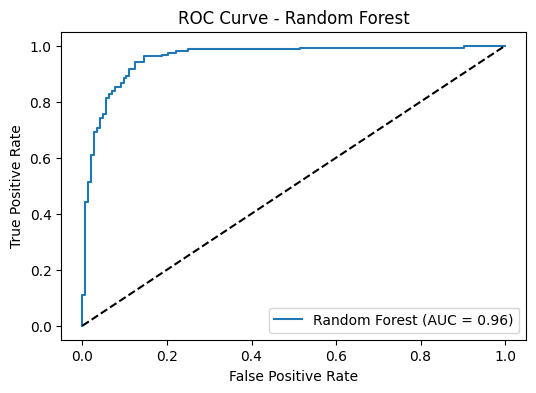


Feature Importances (Random Forest):
1. CreditScore: 0.2447
2. Income: 0.1956
3. YearsWithBank: 0.1693
4. AccountBalance: 0.1482
5. LoanAmount: 0.1280
6. Age: 0.0811
7. NumOfProducts: 0.0176
8. EmploymentDuration: 0.0155


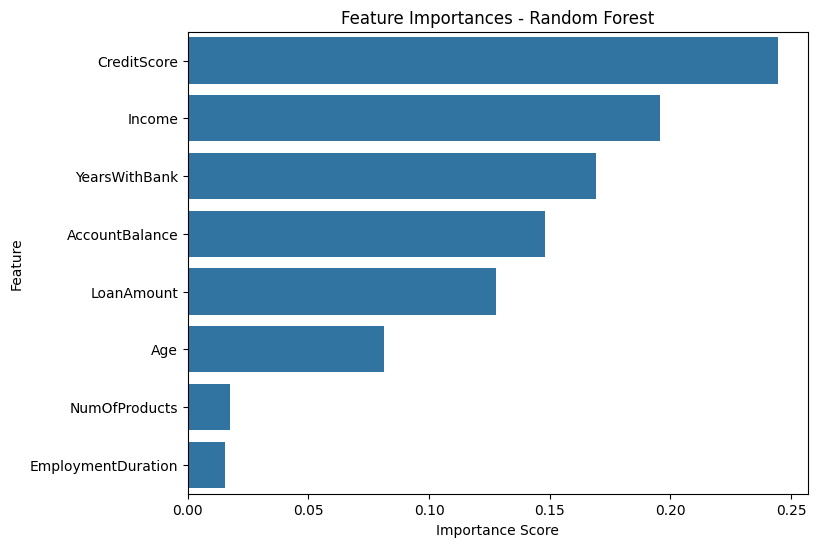

In [ ]:
# =============================================================================
# Title: Decision Trees & Random Forests in Banking & Finance
#
# Aim:
#   To predict customer default risk using decision tree and random forest models.
#
# Scope:
#   - Simulate a synthetic banking dataset mimicking features like Age, Income, Loan Amount, etc.
#   - Train and evaluate a Decision Tree classifier and a Random Forest classifier.
#   - Visualize model performance and interpret feature importance.
#
# Hypotheses:
#   1. Customer financial and demographic features (e.g., income, credit score, loan amount)
#      significantly influence the probability of default.
#   2. An ensemble method (Random Forest) will provide better generalization and performance
#      compared to a single decision tree due to reduced overfitting.
#
# Methodology:
#   - Data Simulation: Create a synthetic dataset with features representative of a banking context.
#   - Exploratory Data Analysis (EDA): Inspect the dataset's structure and feature distributions.
#   - Data Preprocessing: Split data into training and test sets.
#   - Modeling: Train a Decision Tree and a Random Forest model.
#   - Evaluation: Use accuracy, confusion matrices, classification reports, and ROC curves.
#   - Visualization: Plot the decision tree and feature importances.
# =============================================================================

# ------------------------------
# 1. Importing Libraries
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries from scikit-learn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve)

# Ensure plots appear inline in Colab
%matplotlib inline

# ------------------------------
# 2. Data Simulation
# ------------------------------
# For demonstration purposes, we generate a synthetic dataset.
# We assume 8 features that might represent attributes such as:
#   - Age, Income, LoanAmount, CreditScore, NumOfProducts,
#     AccountBalance, YearsWithBank, EmploymentDuration.
# The target variable 'Default' indicates if a customer defaulted (1) or not (0).

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data using make_classification:
# - n_samples: Number of customers
# - n_features: Total number of features
# - n_informative: Features that actually affect the outcome
# - flip_y: Percentage of labels to randomly flip (simulate noise)
X, y = make_classification(n_samples=1000,
                           n_features=8,
                           n_informative=5,   # features with predictive power
                           n_redundant=1,
                           n_repeated=0,
                           n_classes=2,       # binary outcome: Default or not
                           flip_y=0.03,
                           class_sep=1.0,
                           random_state=42)

# Create a DataFrame for better readability and interpretation.
feature_names = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                 'NumOfProducts', 'AccountBalance', 'YearsWithBank', 'EmploymentDuration']
data = pd.DataFrame(X, columns=feature_names)
data['Default'] = y

# Display the first 5 rows of the dataset
print("First 5 rows of the synthetic banking dataset:")
print(data.head())

# ------------------------------
# 3. Exploratory Data Analysis (EDA)
# ------------------------------
print("\nDataset Summary:")
print(data.describe())

# Plotting the distribution of each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(feature_names):
    plt.subplot(2, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Check the balance of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=data)
plt.title('Distribution of Default')
plt.show()

# ------------------------------
# 4. Data Preprocessing and Splitting
# ------------------------------
# In this simulation, we don't need to handle missing values or encode categorical variables.
# We proceed to split the dataset into training and testing sets (70% train, 30% test).

# Separate features (X) and target variable (y)
X = data[feature_names]
y = data['Default']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------------
# 5. Decision Tree Classifier
# ------------------------------
# The Decision Tree model is simple and interpretable.
# Here, we limit the tree depth to 5 to prevent overfitting and maintain clarity.

# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the decision tree on the training set
dtree.fit(X_train, y_train)

# Predict on the test set using the trained model
y_pred_dt = dtree.predict(X_test)

# Evaluate the Decision Tree model
print("\nDecision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# ROC Curve for the Decision Tree
y_prob_dt = dtree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(6, 4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Visualize the Decision Tree structure
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=feature_names, class_names=['No Default', 'Default'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# ------------------------------
# 6. Random Forest Classifier
# ------------------------------
# Random Forest builds an ensemble of decision trees and aggregates their predictions.
# This often leads to improved accuracy and robustness.
# We use 100 trees and limit the depth of each tree to 5.

# Initialize the Random Forest classifier
rforest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the Random Forest on the training set
rforest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rforest.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ROC Curve for the Random Forest
y_prob_rf = rforest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# ------------------------------
# 7. Feature Importance Analysis
# ------------------------------
# Random Forest provides insight into which features are most influential.
# Here we extract and plot the feature importances.

# Extract feature importances from the Random Forest model
importances = rforest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("\nFeature Importances (Random Forest):")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]}: {importances[indices[f]]:.4f}")

# Visualize feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# ------------------------------
# 8. Conclusion & Discussion
# ------------------------------
# In this lesson, we:
#   - Simulated a banking dataset to mimic customer financial profiles.
#   - Conducted exploratory data analysis to understand data distributions.
#   - Built a Decision Tree and a Random Forest classifier to predict customer default risk.
#   - Evaluated the models using accuracy, confusion matrices, classification reports, and ROC curves.
#   - Visualized the decision tree and the feature importance of the Random Forest.
#
# Key takeaways:
#   - While the Decision Tree provides clear, interpretable rules, it may be prone to overfitting.
#   - The Random Forest model, by aggregating multiple trees, can achieve better performance and
#     offers insights on the relative importance of features.
#   - Such models are critical in banking and finance for risk assessment and decision-making.
